In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos


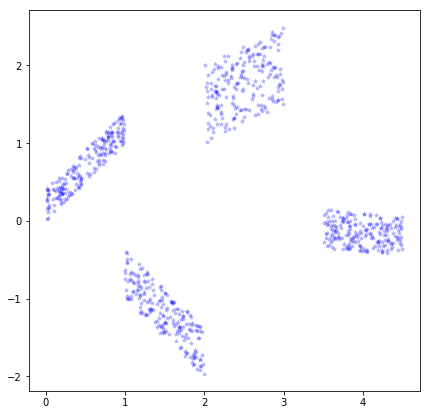

In [2]:
dlen = 200

Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]

Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]

Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]

Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'*b',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [3]:
mapsize = [20,20] #
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.010000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.108000, quantization error: 0.229529

 epoch: 2 ---> elapsed time:  0.108000, quantization error: 0.113068

 epoch: 3 ---> elapsed time:  0.106000, quantization error: 0.077781

 epoch: 4 ---> elapsed time:  0.105000, quantization error: 0.074467

 epoch: 5 ---> elapsed time:  0.105000, quantization error: 0.067995

 epoch: 6 ---> elapsed time:  0.105000, quantization error: 0.064031

 epoch: 7 ---> elapsed time:  0.111000, quantization error: 0.059945

 epoch: 8 ---> elapsed time:  0.106000, quantization error: 0.056427

 epoch: 9 ---> elapsed time:  0.110000, quantization error: 0.052934

 epoch: 10 ---> elapsed time:  0.105000, quantization error: 0.049218

 epoch: 11 ---> elapsed time:  0.106000, quantization error: 0.046041

 epoch: 12 ---> elapsed time:  0.106000, quantization error: 0.043024

 epoch: 13 --

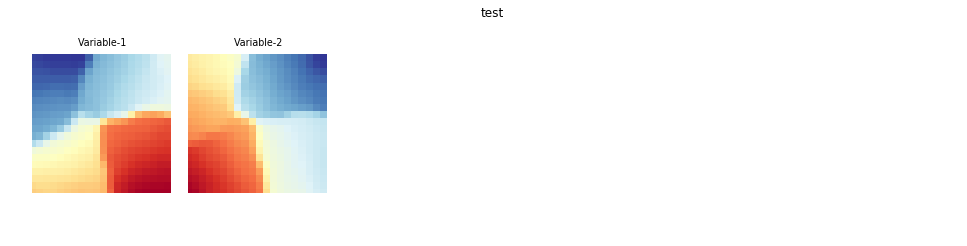

In [4]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

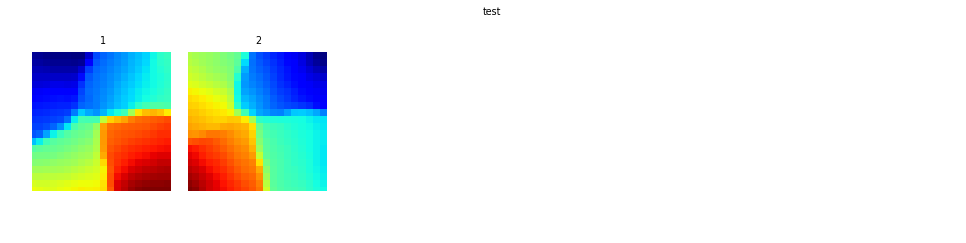

In [5]:
som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

In [10]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


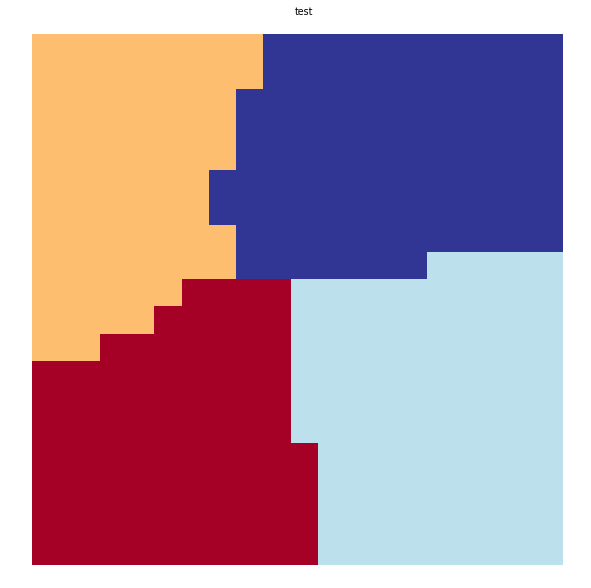

In [11]:
v.show(som, what='cluster')

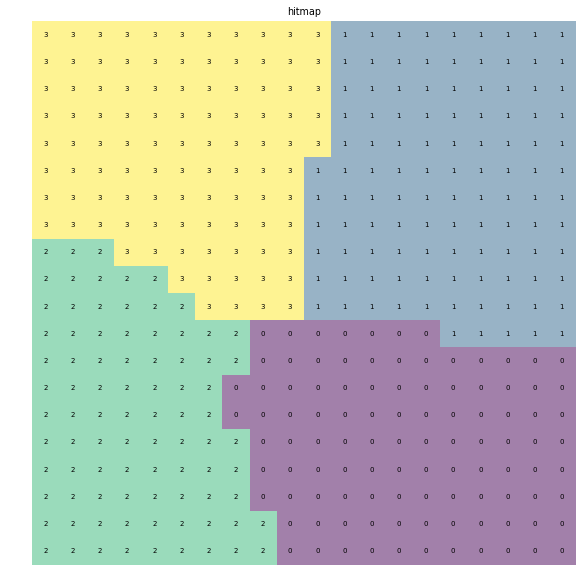

In [12]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

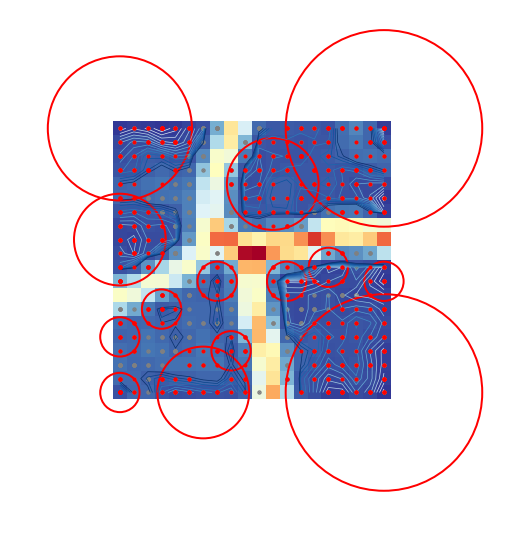

In [14]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=True)

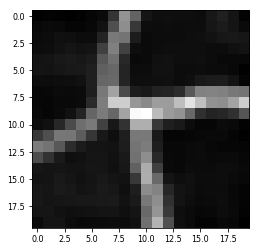

In [16]:
greyMat = UMAT[1]
plt.imshow(greyMat, cmap="gray")
plt.show()

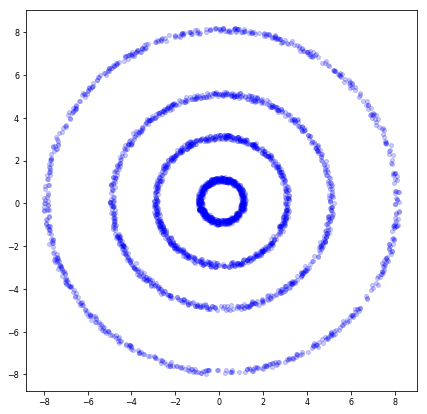

In [19]:
dlen = 700

tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]

X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data4 = np.concatenate((X4,Y4),axis=1)

Data2 = np.concatenate((Data1,Data2,Data3,Data4),axis=0)

fig = plt.figure()
plt.plot(Data2[:,0],Data2[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)
# plt.plot(np.cos(tetha))

In [20]:
mapsize = [30,30]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.010000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.121000, quantization error: 0.355692

 epoch: 2 ---> elapsed time:  0.117000, quantization error: 0.224818

 epoch: 3 ---> elapsed time:  0.116000, quantization error: 0.184695

 epoch: 4 ---> elapsed time:  0.117000, quantization error: 0.165789

 epoch: 5 ---> elapsed time:  0.116000, quantization error: 0.141148

 epoch: 6 ---> elapsed time:  0.116000, quantization error: 0.120340

 epoch: 7 ---> elapsed time:  0.114000, quantization error: 0.097724

 epoch: 8 ---> elapsed time:  0.121000, quantization error: 0.074971

 epoch: 9 ---> elapsed time:  0.115000, quantization error: 0.055965

 epoch: 10 ---> elapsed time:  0.118000, quantization error: 0.038468

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 13

 epoch: 1 ---> elapsed time:  0.115000, quantization error: 0.028720

 

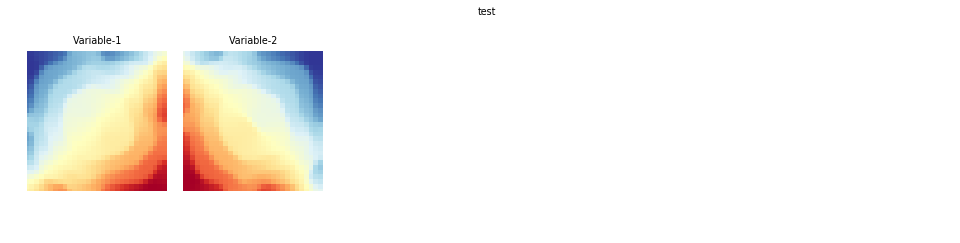

In [22]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)

v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


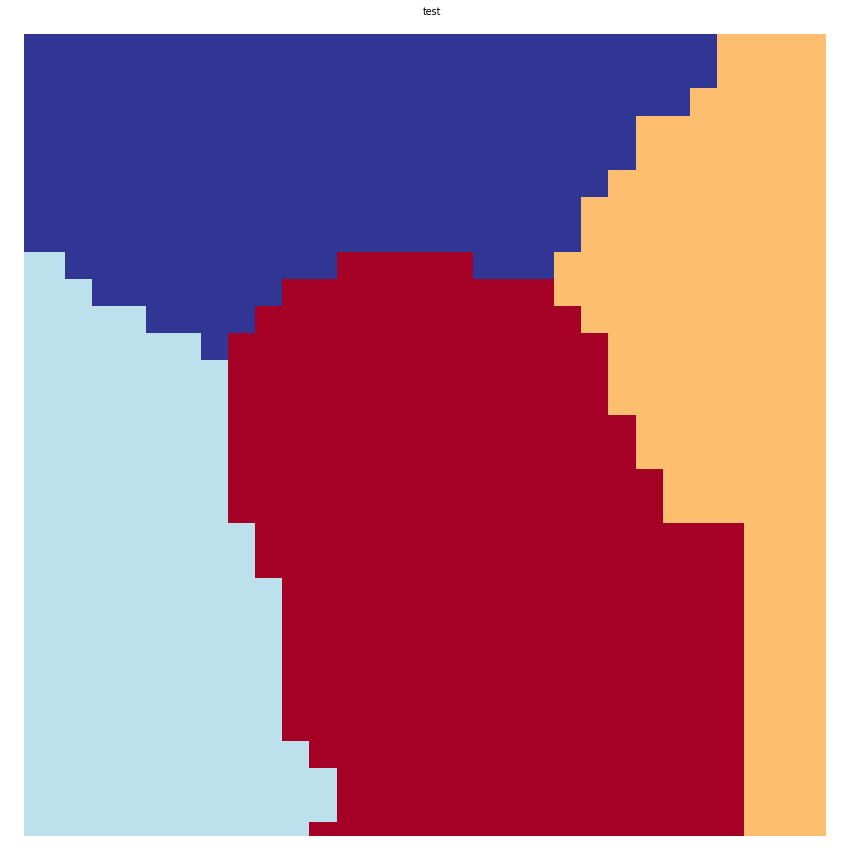

In [23]:
#In this case, K-means simply fails as expected

v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
v.show(som, what='cluster')
# v.save('kmeans_test')

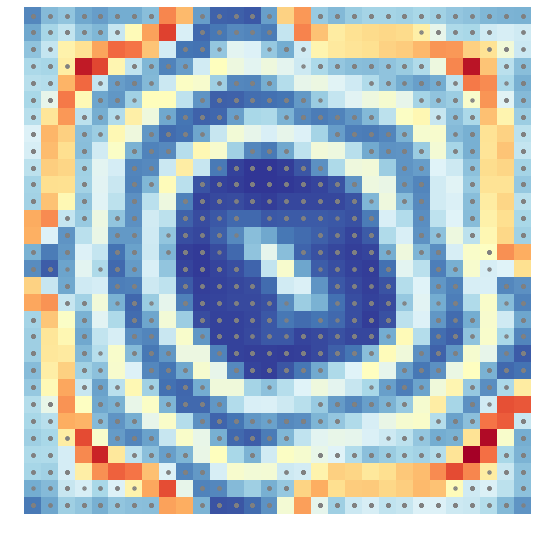

In [24]:
#But Umatrix finds the clusters easily

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMATT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMATT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)

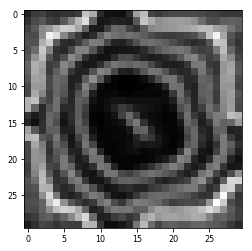

In [25]:
greyMat = UMATT[1]
plt.imshow(greyMat, cmap="gray")
plt.show()